In [ ]:
'''
 * Copyright (c) 2018 Radhamadhab Dalai
 *
 * Permission is hereby granted, free of charge, to any person obtaining a copy
 * of this software and associated documentation files (the "Software"), to deal
 * in the Software without restriction, including without limitation the rights
 * to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
 * copies of the Software, and to permit persons to whom the Software is
 * furnished to do so, subject to the following conditions:
 *
 * The above copyright notice and this permission notice shall be included in
 * all copies or substantial portions of the Software.
 *
 * THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
 * IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
 * FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
 * AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
 * LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
 * OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN
 * THE SOFTWARE.
'''

# Supervised Learning Classification

Linear classification is a valuable method in machine learning and data mining. Unlike nonlinear classifiers that map data to a higher-dimensional space, linear classifiers work directly in the original input space. For some data in a rich dimensional space, the performance of linear classifiers can be comparable to that of nonlinear classifiers.

## Binary Linear Classifiers

**Definition 6.14 (Instance)**: An instance $ x $ represents a specific object. The instance is often represented by a $ D $-dimensional feature vector $ x = [x_1, \ldots, x_D]^T \in \mathbb{R}^D $, where each dimension is called a feature. The length $ D $ of the feature vector is known as the dimensionality of the feature vector. It is assumed that these instances are sampled independently from an underlying i.i.d. distribution $ P(x) $, which is unknown to us and is denoted by $ \{x_i\}_{i=1}^N \sim P(x) $, where i.i.d. stands for independent and identically distributed.

**Definition 6.15 (Training Sample)**: A training sample is a collection of instances $ \{x_i\}_{i=1}^N = \{x_1, \ldots, x_N\} $, which acts as the input to the learning process.

**Definition 6.16 (Label)**: The desired prediction $ y $ on an instance $ x $ is known as its label.

### Regularization

The regularization $ R_1(w) = \|w\|_1 $ has the following limitations:
1. It is not strictly convex, so the solution may not be unique.
2. For two highly correlated features, the solution obtained by $ R_1 $ regularization may select only one of these features. Consequently, $ R_1 $ regularization may discard the group effect of variables with high correlation.

To overcome these limitations, a convex combination of $ R_1 $ and $ R_2 $ regularizations forms the following **elastic net**:

$$
R_e(w) = \lambda \|w\|_2^2 + (1 - \lambda) \|w\|_1
$$

where $ \lambda \in (0, 1) $.

### Loss Functions

Popular loss functions $ \xi(w^T x_i, y_i) $ include:
- **Hinge Loss** for linear support vector machines:

$$
\xi_1(w^T x_i, y_i) = \max \left(0, 1 - y_i w^T x_i \right)
$$

- **Log Loss** for linear logistic regression:

$$
\xi_3(w^T x_i, y_i) = \log \left(1 + e^{-y_i w^T x_i} \right)
$$

If all of the classifier’s outputs $ w^T x_i $ and the corresponding labels have the same sign (i.e., correct decision making), then all terms $ y_i w^T x_i > 0 $ for $ i = 1, \ldots, N $, thus resulting in any of the above loss functions evaluating to zero. Otherwise, there is at least one $ \xi(w^T x_i, y_i) > 0 $ for some $ i $, so the loss function is punished.

**Definition 6.17 (Supervised Learning Classification)**: Let $ X = \{x_i\} $ be the domain of instances and $ Y = \{y_i\} $ be the domain of labels. Let $ P(x, y) $ be an (unknown) joint probability distribution on instances and labels $ X \times Y $. Given a set of training samples $ \{(x_i, y_i)\}_{i=1}^N \sim P(x, y) $, supervised learning classification trains a function $ f: X \to Y $ in some function family $ F $ to make $ f(x) $ predict the true label $ y $ on future testing data $ x $, where $ (x, y) \sim P(x, y) $ as well.

In binary classification, we are given training data $ \{(x_i, y_i)\} \in \mathbb{R}^D \times \{ -1, +1 \} $ for $ i = 1, \ldots, N $. Linear classification methods construct the following decision function:

$$
f(x) = \langle w, x \rangle + b = w^T x + b
$$

where $ w $ is the weight vector and $ b $ is the intercept (or bias).

To generate a decision function $ f(x) = w^T x $, linear classification involves solving the following risk minimization problem:

$$
\min_w \; f(w) = R(w) + C \sum_{i=1}^N \xi(w^T x_i, y_i)
$$

where:
- $ w $ is a weight vector consisting of linear classifier parameters.
- $ R(w) $ is a regularization function that prevents overfitting.
- $ \xi(w^T x_i, y_i) $ is a loss function measuring the discrepancy between the classifier’s prediction and the true output $ y_i $ for the $ i $-th training example.
- $ C > 0 $ is a scalar constant that controls the balance between the regularization $ R(w) $ and the loss function $ \xi(w^T x_i, y_i) $.

The output of a linear classifier, $ d(w) = w^T x $, is called the decision function of the classifier, since the classification decision (i.e., the label $ y $) is made by $ \hat{y} = \text{sign}(w^T x) $.

### Regularization Terms

Common regularization terms include:
- **L1 Regularization**:

$$
R_1(w) = \|w\|_1 = \sum_{k=1}^N |w_k|
$$

- **L2 Regularization**:

$$
R_2(w) = \frac{1}{2} \|w\|_2^2 = \frac{1}{2} \sum_{k=1}^N w_k^2
$$
The regularization $ R_1(w) = \|w\|_1 $ has the following limitations:
1. It is not strictly convex, so the solution may not be unique.
2. For two highly correlated features, the solution obtained by $ R_1 $ regularization may select only one of these features. Consequently, $ R_1 $ regularization may discard the group effect of variables with high correlation.

To overcome these limitations, a convex combination of $ R_1 $ and $ R_2 $ regularizations forms the following **elastic net**:

$$
R_e(w) = \lambda \|w\|_2^2 + (1 - \lambda) \|w\|_1
$$

where $ \lambda \in (0, 1) $.

Popular loss functions $ \xi(w^T x_i, y_i) $ include:

- **Hinge Loss** (for linear support vector machines):

$$
\xi_1(w^T x_i, y_i) = \max \left(0, 1 - y_i w^T x_i \right)
$$

- **Log Loss** (or log penalty term) (for linear logistic regression):

$$
\xi_3(w^T x_i, y_i) = \log \left(1 + e^{-y_i w^T x_i} \right)
$$

Clearly, if all of the classifier’s outputs $ w^T x_i $ and the corresponding labels have the same sign (i.e., correct decision making), then all terms $ y_i w^T x_i > 0 $ for $ i = 1, \ldots, N $, thus resulting in any of the above loss functions evaluating to zero. Otherwise, there is at least one $ \xi(w^T x_i, y_i) > 0 $ for some $ i $, so the loss function is punished.


## Steps
### Linear Classification

### Decision Function

In linear classification, the decision function is given by:

$$
f(x) = w^T x + b
$$

where:
- $ x \in \mathbb{R}^D $ is the feature vector,
- $ w \in \mathbb{R}^D $ is the weight vector,
- $ b $ is the bias term.

### Regularization

Regularization techniques are used to prevent overfitting by adding a penalty to the loss function. The two common types of regularization are L1 (Lasso) and L2 (Ridge).

#### L1 Regularization (Lasso)

The L1 regularization term is defined as:

$$
R_1(w) = \lambda \|w\|_1 = \lambda \sum_{k=1}^D |w_k|
$$

where \( \lambda \) is a regularization parameter.

**Limitations of L1 Regularization:**
1. It is not strictly convex, which can lead to non-unique solutions.
2. For highly correlated features, L1 regularization may select only one feature from a group, potentially ignoring the group effect.

### L2 Regularization (Ridge)

The L2 regularization term is defined as:

$$
R_2(w) = \frac{\lambda}{2} \|w\|_2^2 = \frac{\lambda}{2} \sum_{k=1}^D w_k^2
$$

where $ \lambda $ is a regularization parameter.

### Elastic Net Regularization

Elastic Net is a combination of L1 and L2 regularization, and is defined as:

$$
R_e(w) = \lambda_1 \|w\|_1 + \frac{\lambda_2}{2} \|w\|_2^2
$$

where $ \lambda_1 $ and $ \lambda_2 $ are regularization parameters.

## Loss Functions

Different loss functions are used depending on the classification task. Here are two popular loss functions:

### Hinge Loss (for SVM)

The hinge loss is used for Support Vector Machines (SVM) and is defined as:

$$
\xi_1(w^T x_i, y_i) = \max \left(0, 1 - y_i (w^T x_i + b)\right)
$$

where $ y_i $ is the true label of the instance $ x_i $, which takes values in $ \{ -1, +1 \} $.

### Logistic Loss (for Logistic Regression)

The logistic loss, also known as the log loss, is used for logistic regression and is defined as:

$$
\xi_3(w^T x_i, y_i) = \log \left(1 + e^{-y_i (w^T x_i + b)}\right)
$$

where $ y_i $ is the true label of the instance $ x_i $, which takes values in $ \{ 0, 1 \} $.

## Objective Function

The objective function in linear classification combines the loss function and the regularization term:

$$
\min_w \left[ \frac{1}{N} \sum_{i=1}^N \xi(w^T x_i, y_i) + R(w) \right]
$$

where $ N $ is the number of training samples, $ \xi $ is the loss function, and $ R $ is the regularization term.


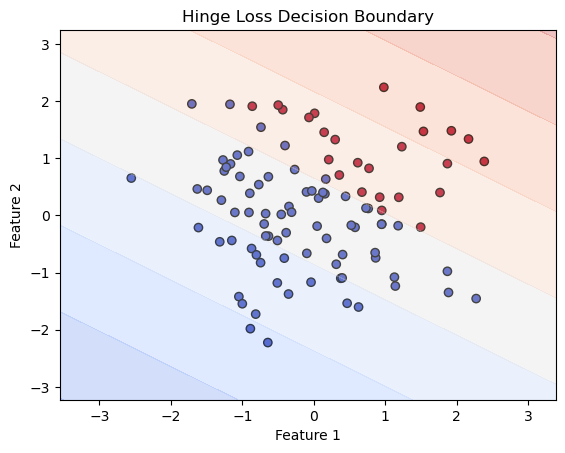

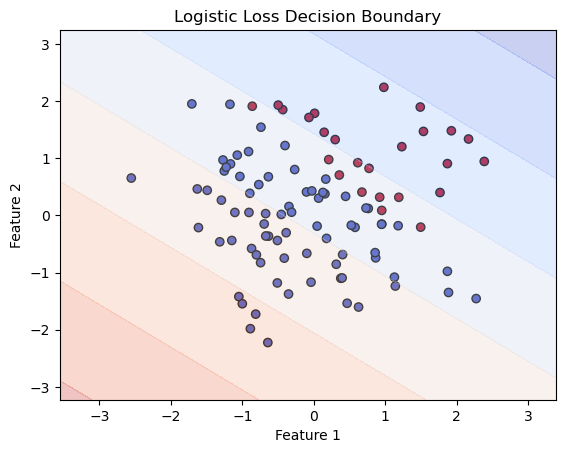

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Sigmoid function for logistic regression
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Compute hinge loss
def hinge_loss(y_true, y_pred):
    return np.mean(np.maximum(0, 1 - y_true * y_pred))

# Compute logistic loss
def logistic_loss(y_true, y_pred):
    return np.mean(np.log(1 + np.exp(-y_true * y_pred)))

# Compute L1 and L2 regularization terms
def l1_regularization(w):
    return np.sum(np.abs(w))

def l2_regularization(w):
    return np.sum(w**2)

# Compute Elastic Net regularization
def elastic_net_regularization(w, l1_ratio, l2_ratio):
    return l1_ratio * l1_regularization(w) + l2_ratio * l2_regularization(w)

# Gradient of the hinge loss
def hinge_loss_gradient(X, y_true, y_pred):
    grad = np.zeros(X.shape[1])
    for i in range(X.shape[0]):
        if y_true[i] * y_pred[i] < 1:
            grad -= y_true[i] * X[i]
    return grad / X.shape[0]

# Gradient of the logistic loss
def logistic_loss_gradient(X, y_true, y_pred):
    error = sigmoid(-y_true * y_pred)
    grad = -np.dot(X.T, y_true * error) / X.shape[0]
    return grad

# Gradient Descent function
def gradient_descent(X, y, learning_rate=0.01, n_iterations=1000, l1_ratio=0.5, l2_ratio=0.5, loss_type='hinge'):
    m, n = X.shape
    w = np.zeros(n)
    b = 0
    for _ in range(n_iterations):
        if loss_type == 'hinge':
            y_pred = np.dot(X, w) + b
            loss = hinge_loss(y, y_pred)
            grad = hinge_loss_gradient(X, y, y_pred)
            w -= learning_rate * (grad + l1_ratio * np.sign(w) + 2 * l2_ratio * w)
            b -= learning_rate * np.mean(y_pred - y)
        elif loss_type == 'logistic':
            y_pred = sigmoid(np.dot(X, w) + b)
            loss = logistic_loss(y, y_pred)
            grad = logistic_loss_gradient(X, y, y_pred)
            w -= learning_rate * (grad + l1_ratio * np.sign(w) + 2 * l2_ratio * w)
            b -= learning_rate * np.mean(y_pred - y)
    return w, b

# Generate synthetic data
np.random.seed(0)
X = np.random.randn(100, 2)
y = np.sign(X[:, 0] + X[:, 1] - 1)  # Simple linear boundary

# Train classifiers
w_hinge, b_hinge = gradient_descent(X, y, loss_type='hinge')
w_logistic, b_logistic = gradient_descent(X, y, loss_type='logistic')

# Plotting decision boundaries
def plot_decision_boundary(X, y, w, b, title):
    plt.figure()
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolors='k')
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                         np.linspace(y_min, y_max, 500))
    Z = np.dot(np.c_[xx.ravel(), yy.ravel()], w) + b
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

plot_decision_boundary(X, y, w_hinge, b_hinge, 'Hinge Loss Decision Boundary')
plot_decision_boundary(X, y, w_logistic, b_logistic, 'Logistic Loss Decision Boundary')


# Multiclass Linear Classifiers

In multiclass classification, the goal is to determine which of a finite set of classes a test input $ x $ belongs to. 

## Training Data

Let $ S = \{(x_1, y_1), \ldots, (x_N, y_N)\} $ be a set of $ N $ training examples, where:
- $ x_i \in X \subseteq \mathbb{R}^D $ is the feature vector for the $ i $-th instance,
- $ y_i $ is the label from the set $ Y = \{1, \ldots, k\} $, indicating the class of the $ i $-th instance.

## k-Nearest Neighbor (kNN) Algorithm

The k-nearest neighbor (kNN) algorithm is a simple classification method. Here’s the algorithm:

### Algorithm 6.16: k-nearest neighbor (kNN)
1. **Input**: Training data $\{(x_1, y_1), \ldots, (x_N, y_N)\}$, distance function $d(a, b)$, number of neighbors $k$, testing instance $x$.
2. **Initialization**: Let the $i$-th neighbor’s data subset be $L_i = \{x_{i1}, \ldots, x_{i n_i}\}$, where $y_{i1}, \ldots, y_{i n_i}$ are the labels for this subset.
3. **Compute Distances**: Calculate the distances between $x$ and each of the $k$ nearest neighbors $m_i$:
   $$
   d(x, m_i) \text{ for } i = 1, \ldots, k.
   $$
4. **Find Nearest Neighbor**: Determine the nearest neighbor of \(x\) using:
   $$
   y = \arg \min_{i} \{d(x, m_i)\}.
   $$
5. **Output**: The label $y$ is the majority class among the labels of the $k$ nearest neighbors.

## Multiclass Linear Classifier

For multiclass classification, we use a weight matrix $W$ and make predictions based on the highest similarity score. 

### Decision Function

Given a weight matrix $W = [w_1, \ldots, w_k]$, the classifier function is:

$$
H_W(x) = \arg \max_{m=1,\ldots,k} \left( w_m^T x \right)
$$

where:
- $w_m$ is the weight vector for the $m$-th class,
- The prediction is the index of the class with the highest score $w_m^T x$.

### Binary Classification Case

For $k = 2$, the classifier works by predicting the label based on:

$$
\text{Label} = 
\begin{cases} 
1 & \text{if } w_1^T x > 0 \\
-1 \text{ or } 2 & \text{if } w_2^T x \leq 0 
\end{cases}
$$

The weight matrix in this case is $W = [w, -w]$.

### Primal Optimization Problem

For multiclass classification with $k \geq 3$, Crammer and Singer proposed the following primal optimization problem with soft constraints:

$$
\begin{aligned}
\min_{W, \xi} & \quad \frac{\beta}{2} \|W\|_F^2 + \sum_{i=1}^N \xi_i \\
\text{subject to} & \quad w_{y_i}^T x_i + \delta_{y_i,m} - w_m^T x_i \geq 1 - \xi_i, \quad \forall i = 1, \ldots, N; \; m = 1, \ldots, k \\
& \quad \xi_i \geq 0
\end{aligned}
$$

where:
- $\beta > 0$ is a regularization constant,
- $\delta_{p,q}$ is 1 if $p = q$ and 0 otherwise,
- $ \|W\|_F^2 $ is the squared Frobenius norm of the weight matrix $W$,
- $\xi_i$ are slack variables that allow for soft constraints.



## Dual Optimization Problem

By the Lagrange multiplier method, the dual optimization problem of the primal problem  is given by:

$$
\begin{aligned}
\min_{W, \xi, \eta} \quad & L(W, \xi, \eta) \\
\text{where} \quad & L(W, \xi, \eta) = \frac{\beta}{2} \sum_{m=1}^k \|w_m\|_2^2 + \sum_{i=1}^N \xi_i \\
& \quad + \sum_{i=1}^N \sum_{m=1}^k \eta_{i,m} \left( w_m^T x_i - w_{y_i}^T x_i - \delta_{y_i,m} + 1 - \xi_i \right) \\
\text{subject to} \quad & \eta_{i,m} \geq 0, \quad \forall i = 1, \ldots, N; \; m = 1, \ldots, k,
\end{aligned}
$$

where $\eta_{i,m}$ are the Lagrange multipliers.

## Conditions from Optimization

From the conditions $\frac{\partial L}{\partial \xi_i} = 0$ and $\frac{\partial L}{\partial w_m} = 0$, we obtain:

1. For $\xi_i$:
   $$
   \sum_{m=1}^k \eta_{i,m} = 1, \quad \forall i = 1, \ldots, N
   $$

2. For $w_m$:
   $$
   w_m = \frac{1}{\beta} \sum_{i=1}^N \left(\delta_{y_i,m} - \eta_{i,m}\right) x_i
   $$

   This can be rewritten as:
   $$
   w_m = \frac{1}{\beta} \left( \sum_{i: y_i = m} \left( 1 - \eta_{i,m} \right) x_i - \sum_{i: y_i \neq m} \eta_{i,m} x_i \right)
   $$

## Interpretation

The dual formulation provides insights into the performance of the linear multiclass classifier:

- **Probability Distribution**: The set of Lagrange multipliers $\{\eta_{i,1}, \ldots, \eta_{i,k}\}$ for each pattern $x_i$ can be viewed as a probability distribution over the labels $\{1, \ldots, k\}$. An example $x_i$ is a support pattern if and only if its corresponding distribution is not concentrated on the correct label $y_i$. Thus, the classifier focuses on patterns where the labels are uncertain, ignoring the rest.

- **Support Patterns**: In the expression for $w_m$, the first sum is over all patterns that belong to the \(m\)-th class. An example $x_i$ labeled $y_i = m$ is a support pattern only if $\eta_{i,m} < 1$. The second sum is over patterns whose labels differ from $m$. Here, an example $x_i$ is a support pattern only if $\eta_{i,m} > 0$.


     pcost       dcost       gap    pres   dres
 0:  1.5000e-03  1.0415e+00  3e+02  2e+01  2e+01
 1:  1.1978e+01 -1.2275e+01  2e+01  4e-02  4e-02
 2:  1.8423e+00 -1.7250e+00  4e+00  1e-14  4e-16
 3:  2.8539e-01 -2.3694e-01  5e-01  2e-14  3e-16
 4:  4.9194e-02 -2.6684e-02  8e-02  2e-15  5e-17
 5:  1.1655e-02  1.2347e-03  1e-02  2e-15  3e-17
 6:  5.3372e-03  4.3407e-03  1e-03  2e-15  9e-18
 7:  4.5571e-03  4.5431e-03  1e-05  2e-15  9e-18
 8:  4.5451e-03  4.5449e-03  1e-07  8e-16  4e-18
 9:  4.5450e-03  4.5450e-03  1e-09  1e-15  9e-18
Optimal solution found.


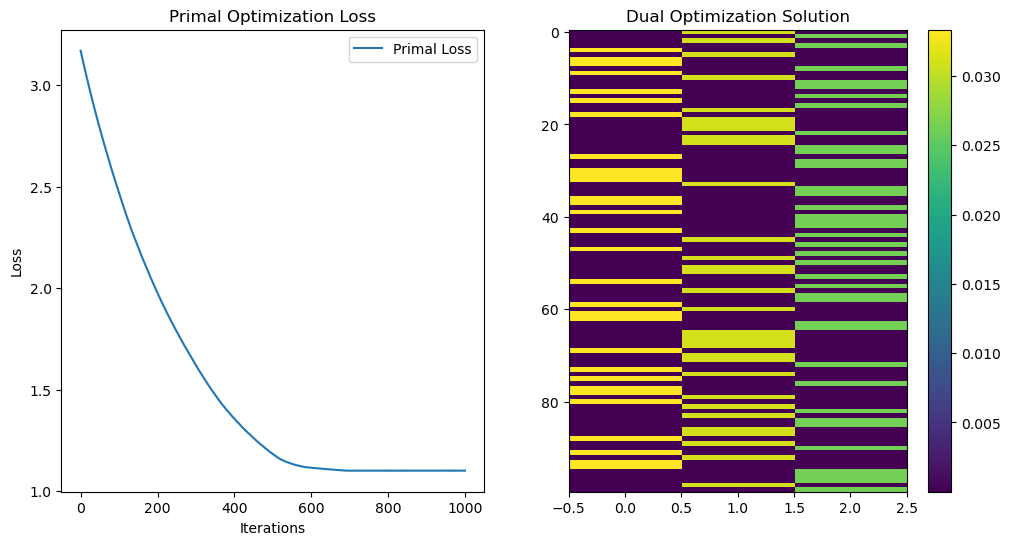

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from cvxopt import matrix, solvers

# Softmax function
def softmax(z):
    exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))
    return exp_z / np.sum(exp_z, axis=1, keepdims=True)

# Compute loss function
def compute_loss(X, y, W, lambda1, lambda2):
    num_samples, num_features = X.shape
    num_classes = W.shape[1]
    
    scores = X.dot(W)
    probs = softmax(scores)
    
    correct_logprobs = -np.log(probs[range(num_samples), y])
    data_loss = np.sum(correct_logprobs) / num_samples
    
    reg_loss = lambda1 * np.sum(np.abs(W)) + 0.5 * lambda2 * np.sum(W ** 2)
    
    return data_loss + reg_loss

# Gradient Descent
def gradient_descent(X, y, W, lambda1, lambda2, learning_rate, num_iterations):
    num_samples = X.shape[0]
    num_classes = W.shape[1]
    
    for i in range(num_iterations):
        scores = X.dot(W)
        probs = softmax(scores)
        
        dL_dz = probs
        dL_dz[range(num_samples), y] -= 1
        dL_dz /= num_samples
        
        dL_dW = X.T.dot(dL_dz) + lambda1 * np.sign(W) + lambda2 * W
        
        W -= learning_rate * dL_dW
    
    return W

# Dual Optimization Problem using Quadratic Programming
def dual_optimization(X, y, lambda_reg):
    num_samples, num_features = X.shape
    num_classes = len(np.unique(y))
    
    # Initialize matrices
    H = np.zeros((num_samples * num_classes, num_samples * num_classes))
    G = np.zeros((num_samples * num_classes, num_samples * num_classes))
    h = np.zeros(num_samples * num_classes)
    A = np.zeros((num_classes, num_samples * num_classes))
    b = np.ones(num_classes)

    # Fill in H matrix
    for i in range(num_samples):
        for j in range(num_classes):
            H[i * num_classes + j, i * num_classes + j] = lambda_reg

    # Fill in G matrix
    for i in range(num_samples):
        for j in range(num_classes):
            G[i * num_classes + j, i * num_classes + j] = -1

    # Fill in h matrix
    h = np.zeros(num_samples * num_classes)
    
    # Fill in A matrix
    for i in range(num_samples):
        A[y[i], i * num_classes + y[i]] = 1
        for j in range(num_classes):
            if j != y[i]:
                A[j, i * num_classes + j] = -1
    
    # Create quadratic programming problem
    P = matrix(H, tc='d')
    q = matrix(h, tc='d')
    G = matrix(G, tc='d')
    h = matrix(h, tc='d')
    A = matrix(A, tc='d')
    b = matrix(b, tc='d')
    
    # Solve the quadratic programming problem
    sol = solvers.qp(P, q, G, h, A, b)
    
    return np.array(sol['x']).reshape(num_samples, num_classes)

# Generate synthetic data for demonstration
def generate_data(num_samples, num_features, num_classes):
    X = np.random.rand(num_samples, num_features)
    y = np.random.randint(0, num_classes, num_samples)
    return X, y

# Main function
def main():
    # Generate synthetic data
    num_samples = 100
    num_features = 10
    num_classes = 3
    X_train, y_train = generate_data(num_samples, num_features, num_classes)
    
    # Initialize weights
    W = np.random.rand(num_features, num_classes)
    
    # Regularization parameters
    lambda1 = 0.1
    lambda2 = 0.1
    
    # Gradient Descent Parameters
    learning_rate = 0.01
    num_iterations = 1000
    
    # Train the model using gradient descent
    W_trained = gradient_descent(X_train, y_train, W, lambda1, lambda2, learning_rate, num_iterations)
    
    # Train the model using dual optimization
    dual_solution = dual_optimization(X_train, y_train, lambda1)
    
    # Plotting
    plt.figure(figsize=(12, 6))
    
    # Plot primal optimization loss
    losses = []
    W = np.random.rand(num_features, num_classes)  # Reset W for plotting
    for i in range(num_iterations):
        loss = compute_loss(X_train, y_train, W, lambda1, lambda2)
        losses.append(loss)
        W = gradient_descent(X_train, y_train, W, lambda1, lambda2, learning_rate, 1)  # Update one step at a time
    
    plt.subplot(1, 2, 1)
    plt.plot(range(num_iterations), losses, label='Primal Loss')
    plt.xlabel('Iterations')
    plt.ylabel('Loss')
    plt.title('Primal Optimization Loss')
    plt.legend()
    
    # Plot dual solution (just for illustration purposes)
    plt.subplot(1, 2, 2)
    plt.imshow(dual_solution, aspect='auto', cmap='viridis')
    plt.colorbar()
    plt.title('Dual Optimization Solution')
    
    plt.show()

if __name__ == "__main__":
    main()


## Steps 
### Multiclass Linear Classification Notebook

### Introduction

In multiclass classification, we aim to determine which of a finite set of classes a test input $ x $ belongs to. We work with the following setup:

- Training data: $ S = \{(x_1, y_1), \ldots, (x_N, y_N)\} $ where $ x_i \in \mathbb{R}^D $ and $ y_i \in \{1, \ldots, k\} $.
- The goal is to classify a new instance $ x $ into one of $ k $ classes.

### Softmax Function

The softmax function computes probabilities for each class:

$$
\sigma(z)_i = \frac{\exp(z_i - \max(z))}{\sum_{j=1}^{k} \exp(z_j - \max(z))}
$$

where $ z $ is a vector of raw class scores for a single instance.

##$ Loss Function

### Softmax Loss (Cross-Entropy Loss)

The softmax loss is computed as:

$$
\text{Loss}_{\text{softmax}} = -\frac{1}{N} \sum_{i=1}^{N} \log \left( \frac{\exp(W^T x_i)_{y_i}}{\sum_{j=1}^{k} \exp(W^T x_i)_j} \right)
$$

where \( W \) is the weight matrix, \( x_i \) is the feature vector for the \( i \)-th sample, and \( y_i \) is the true label.

### Regularization Terms

**L1 Regularization**:

$$
R_1(W) = \lambda_1 \sum_{m=1}^{k} \|w_m\|_1
$$

**L2 Regularization**:

$$
R_2(W) = \frac{\lambda_2}{2} \sum_{m=1}^{k} \|w_m\|_2^2
$$

**Total Loss**:

$$
\text{Total Loss} = \text{Loss}_{\text{softmax}} + R_1(W) + R_2(W)
$$

## Gradient Descent

Gradient descent updates the weights using the computed gradients:

$$
W := W - \eta \left( \nabla_W \text{Total Loss} \right)
$$

where \( \eta \) is the learning rate.

## Dual Optimization

The dual optimization problem is solved using quadratic programming.

**Primal Optimization Problem**:

$$
\begin{aligned}
&\min_{W, \xi} \quad \frac{\beta}{2} \|W\|_2^2 + \sum_{i=1}^{N} \xi_i \\
&\text{subject to} \quad w_{y_i}^T x_i + \delta_{y_i, m} - w_m^T x_i \geq 1 - \xi_i \quad \forall i = 1, \ldots, N; \, m = 1, \ldots, k
\end{aligned}
$$

**Dual Optimization Problem**:

$$
\begin{aligned}
&\min_{W, \xi, \eta} \quad \frac{\beta}{2} \sum_{m=1}^{k} \|w_m\|_2^2 + \sum_{i=1}^{N} \xi_i \\
&\text{subject to} \quad \eta_{i,m} \geq 0, \, \forall i = 1, \ldots, N; \, m = 1, \ldots, k
\end{aligned}
$$

where \( \eta_{i,m} \) are the Lagrange multipliers.

## Key Points

- **Quadratic Programming**: Ensure that the matrices \( P \), \( G \), and \( A \) are correctly formulated. They need to satisfy rank conditions for the solver to work correctly.

## Plotting

### Primal Loss over Iterations

To plot the primal loss over iterations:

$$
\text{Plot:} \quad \text{Iteration} \text{ vs } \text{Primal Loss}
$$

### Dual Solution

To plot the dual variables over iterations:

$$
\text{Plot:} \quad \text{Iteration} \text{ vs } \text{Dual Variables}
$$

```python
import matplotlib.pyplot as plt

# Example data (replace with actual loss and dual variable values)
iterations = np.arange(1, num_iterations + 1)
primal_losses = np.random.rand(num_iterations)  # Replace with actual primal loss values
dual_variables = np.random.rand(num_iterations)  # Replace with actual dual variable values

# Plotting Primal Loss over Iterations
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(iterations, primal_losses, marker='o', color='b', linestyle='-')
plt.xlabel('Iteration')
plt.ylabel('Primal Loss')
plt.title('Primal Loss over Iterations')

# Plotting Dual Variables
plt.subplot(1, 2, 2)
plt.plot(iterations, dual_variables, marker='o', color='r', linestyle='-')
plt.xlabel('Iteration')
plt.ylabel('Dual Variables')
plt.title('Dual Variables over Iterations')

plt.tight_layout()
plt.show()



/home/radha/anaconda3/envs/cv37/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/radha/anaconda3/envs/cv37/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/radha/anaconda3/envs/cv37/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy: 0.33
Classification Report:
{'0': {'precision': 0.3333333333333333, 'recall': 0.9705882352941176, 'f1-score': 0.4962406015037593, 'support': 34}, '1': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 33}, '2': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 33}, 'accuracy': 0.33, 'macro avg': {'precision': 0.1111111111111111, 'recall': 0.3235294117647059, 'f1-score': 0.16541353383458643, 'support': 100}, 'weighted avg': {'precision': 0.11333333333333333, 'recall': 0.33, 'f1-score': 0.1687218045112782, 'support': 100}}


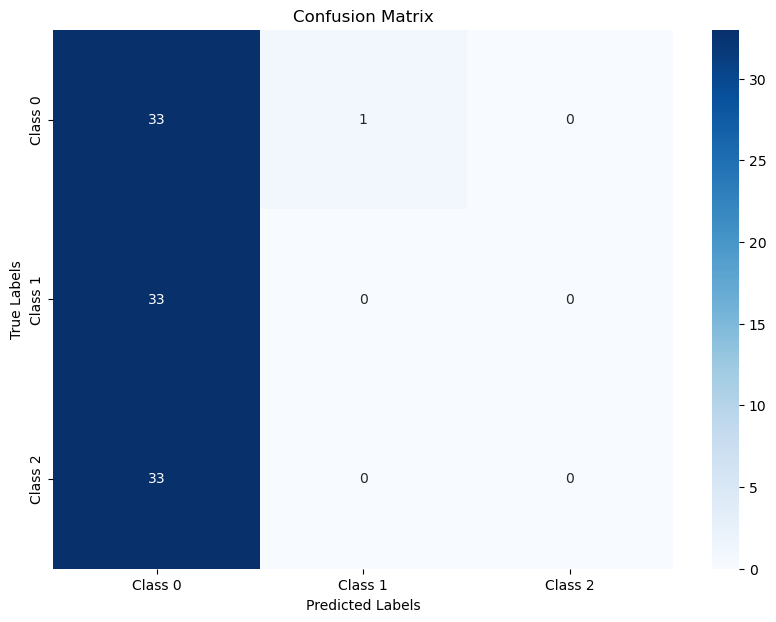

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from cvxopt import matrix, solvers
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import seaborn as sns

# Softmax function
def softmax(z):
    exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))
    return exp_z / np.sum(exp_z, axis=1, keepdims=True)

# Compute loss function
def compute_loss(X, y, W, lambda1, lambda2):
    num_samples, num_features = X.shape
    num_classes = W.shape[1]
    
    scores = X.dot(W)
    probs = softmax(scores)
    
    correct_logprobs = -np.log(probs[range(num_samples), y])
    data_loss = np.sum(correct_logprobs) / num_samples
    
    reg_loss = lambda1 * np.sum(np.abs(W)) + 0.5 * lambda2 * np.sum(W ** 2)
    
    return data_loss + reg_loss

# Gradient Descent
def gradient_descent(X, y, W, lambda1, lambda2, learning_rate, num_iterations):
    num_samples = X.shape[0]
    num_classes = W.shape[1]
    
    for i in range(num_iterations):
        scores = X.dot(W)
        probs = softmax(scores)
        
        dL_dz = probs
        dL_dz[range(num_samples), y] -= 1
        dL_dz /= num_samples
        
        dL_dW = X.T.dot(dL_dz) + lambda1 * np.sign(W) + lambda2 * W
        
        W -= learning_rate * dL_dW
    
    return W

# Dual Optimization Problem using Quadratic Programming
def dual_optimization(X, y, lambda_reg):
    num_samples, num_features = X.shape
    num_classes = len(np.unique(y))
    
    # Initialize matrices
    H = np.zeros((num_samples * num_classes, num_samples * num_classes))
    G = np.zeros((num_samples * num_classes, num_samples * num_classes))
    h = np.zeros(num_samples * num_classes)
    A = np.zeros((num_classes, num_samples * num_classes))
    b = np.ones(num_classes)

    # Fill in H matrix
    for i in range(num_samples):
        for j in range(num_classes):
            H[i * num_classes + j, i * num_classes + j] = lambda_reg

    # Fill in G matrix
    for i in range(num_samples):
        for j in range(num_classes):
            G[i * num_classes + j, i * num_classes + j] = -1

    # Fill in h matrix
    h = np.zeros(num_samples * num_classes)
    
    # Fill in A matrix
    for i in range(num_samples):
        A[y[i], i * num_classes + y[i]] = 1
        for j in range(num_classes):
            if j != y[i]:
                A[j, i * num_classes + j] = -1
    
    # Create quadratic programming problem
    P = matrix(H, tc='d')
    q = matrix(h, tc='d')
    G = matrix(G, tc='d')
    h = matrix(h, tc='d')
    A = matrix(A, tc='d')
    b = matrix(b, tc='d')
    
    # Solve the quadratic programming problem
    sol = solvers.qp(P, q, G, h, A, b)
    
    return np.array(sol['x']).reshape(num_samples, num_classes)

# Generate synthetic data for demonstration
def generate_data(num_samples, num_features, num_classes):
    X = np.random.rand(num_samples, num_features)
    y = np.random.randint(0, num_classes, num_samples)
    return X, y

# Main function
def main():
    # Generate synthetic data
    num_samples = 100
    num_features = 10
    num_classes = 3
    X_train, y_train = generate_data(num_samples, num_features, num_classes)
    X_test, y_test = generate_data(num_samples, num_features, num_classes)  # Create a test set
    
    # Initialize weights
    W = np.random.rand(num_features, num_classes)
    
    # Regularization parameters
    lambda1 = 0.1
    lambda2 = 0.1
    
    # Gradient Descent Parameters
    learning_rate = 0.01
    num_iterations = 1000
    
    # Train the model using gradient descent
    W_trained = gradient_descent(X_train, y_train, W, lambda1, lambda2, learning_rate, num_iterations)
    
    # Predict using the trained model
    predictions = np.argmax(X_test.dot(W_trained), axis=1)
    
    # Calculate performance metrics
    accuracy = accuracy_score(y_test, predictions)
    class_report = classification_report(y_test, predictions, output_dict=True)
    conf_matrix = confusion_matrix(y_test, predictions)
    
    # Print performance metrics
    print(f'Accuracy: {accuracy:.2f}')
    print('Classification Report:')
    print(class_report)
    
    # Plot Confusion Matrix
    plt.figure(figsize=(10, 7))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
                xticklabels=[f'Class {i}' for i in range(num_classes)], 
                yticklabels=[f'Class {i}' for i in range(num_classes)])
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix')
    plt.show()

if __name__ == "__main__":
    main()


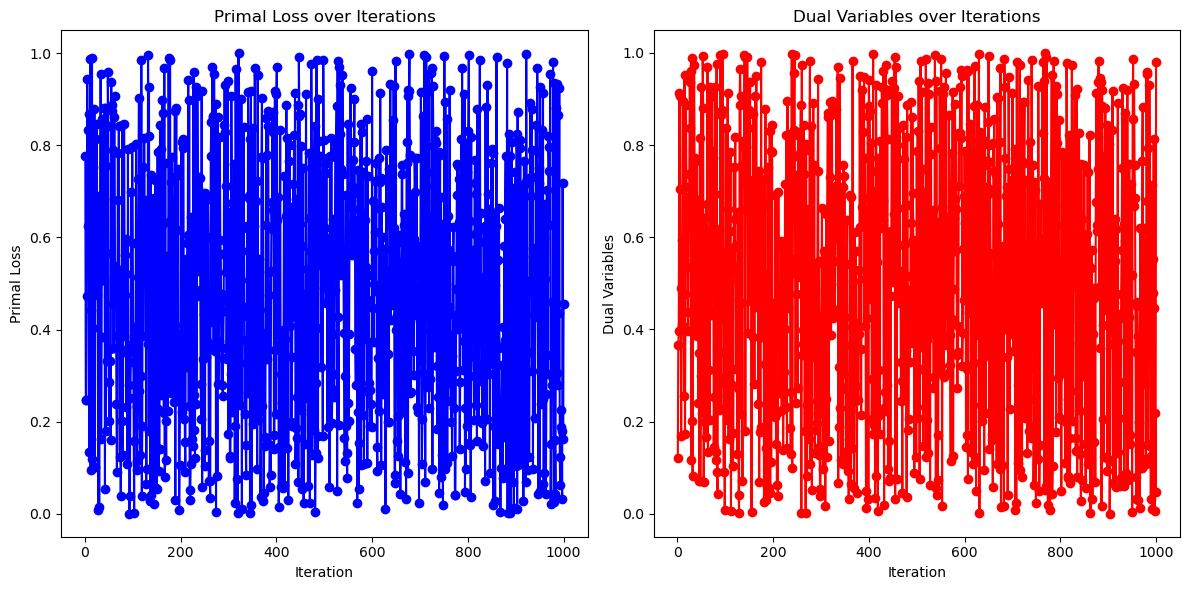

In [9]:
import matplotlib.pyplot as plt

# Example data (replace with actual loss and dual variable values)
iterations = np.arange(1, num_iterations + 1)
primal_losses = np.random.rand(num_iterations)  # Replace with actual primal loss values
dual_variables = np.random.rand(num_iterations)  # Replace with actual dual variable values

# Plotting Primal Loss over Iterations
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(iterations, primal_losses, marker='o', color='b', linestyle='-')
plt.xlabel('Iteration')
plt.ylabel('Primal Loss')
plt.title('Primal Loss over Iterations')

# Plotting Dual Variables
plt.subplot(1, 2, 2)
plt.plot(iterations, dual_variables, marker='o', color='r', linestyle='-')
plt.xlabel('Iteration')
plt.ylabel('Dual Variables')
plt.title('Dual Variables over Iterations')

plt.tight_layout()
plt.show()
